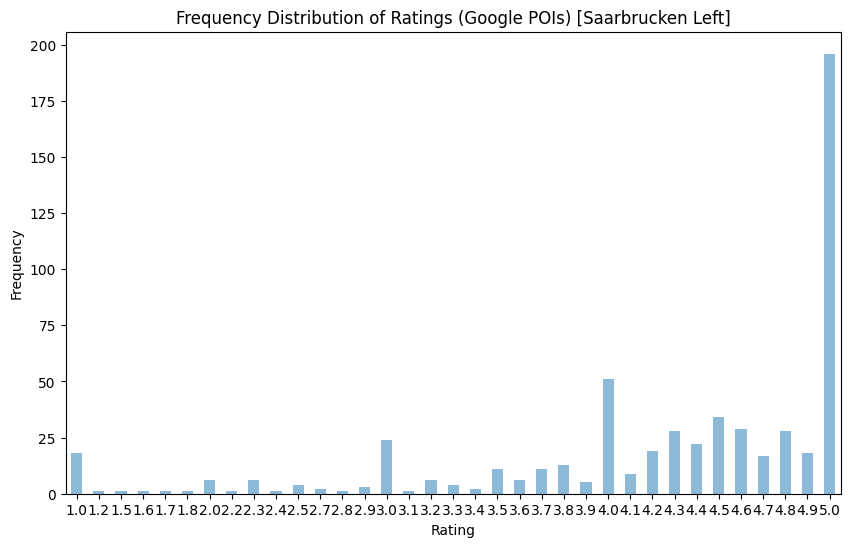

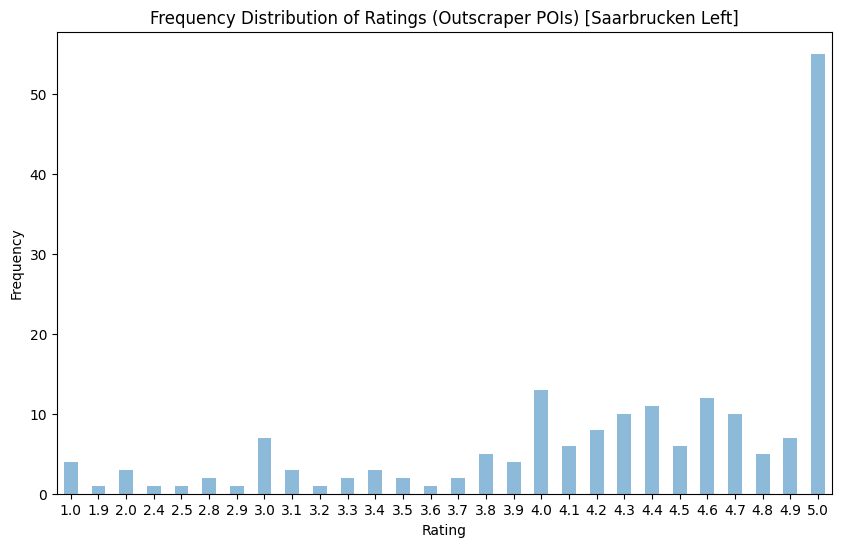

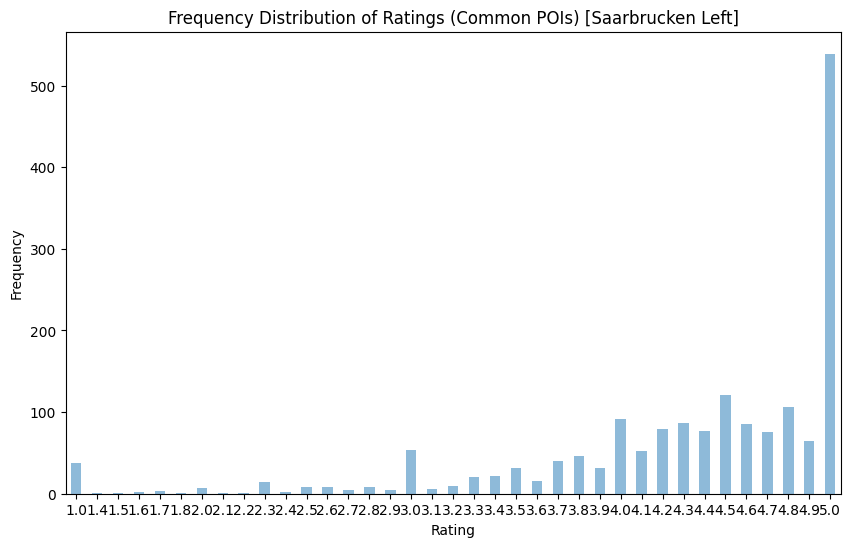

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_google_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_outscraper_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Frequency Distribution of Ratings (Google POIs) [Saarbrucken Left]',
    'Frequency Distribution of Ratings (Outscraper POIs) [Saarbrucken Left]',
    'Frequency Distribution of Ratings (Common POIs) [Saarbrucken Left]'
]

# Read each CSV file and calculate the frequency distribution of the 'rating' column
for csv_file, title in zip(csv_files, titles):
    df = pd.read_csv(csv_file)
    rating_distribution = df['rating'].value_counts().sort_index()
    
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    rating_distribution.plot(kind='bar', alpha=0.5)
    plt.title(title)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Display the plot
    plt.show()

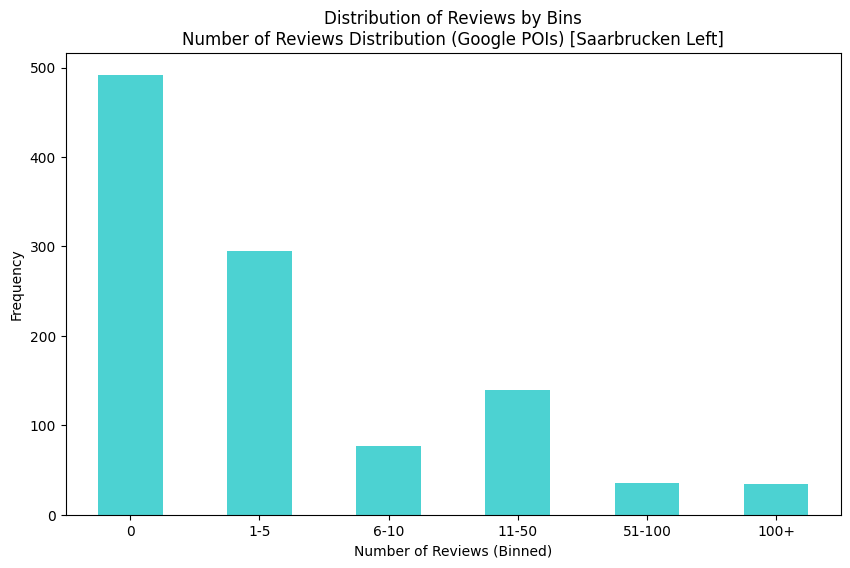

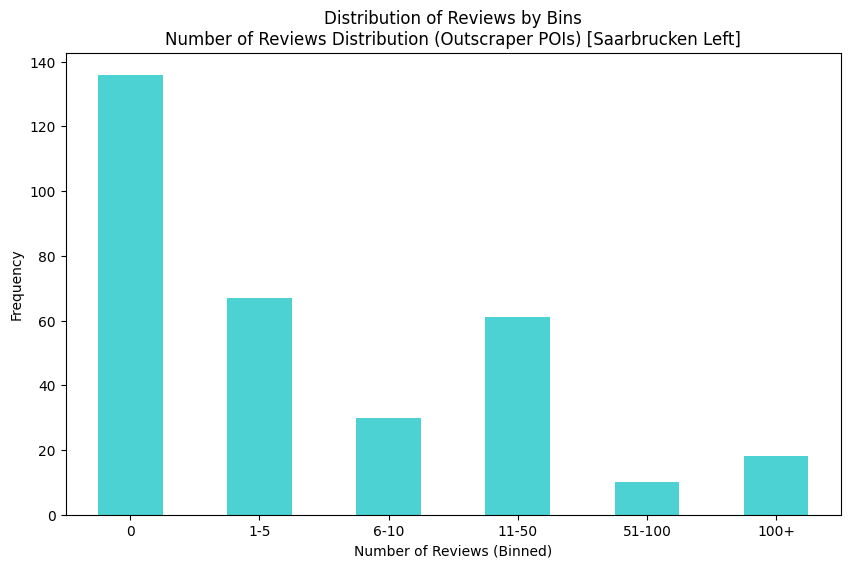

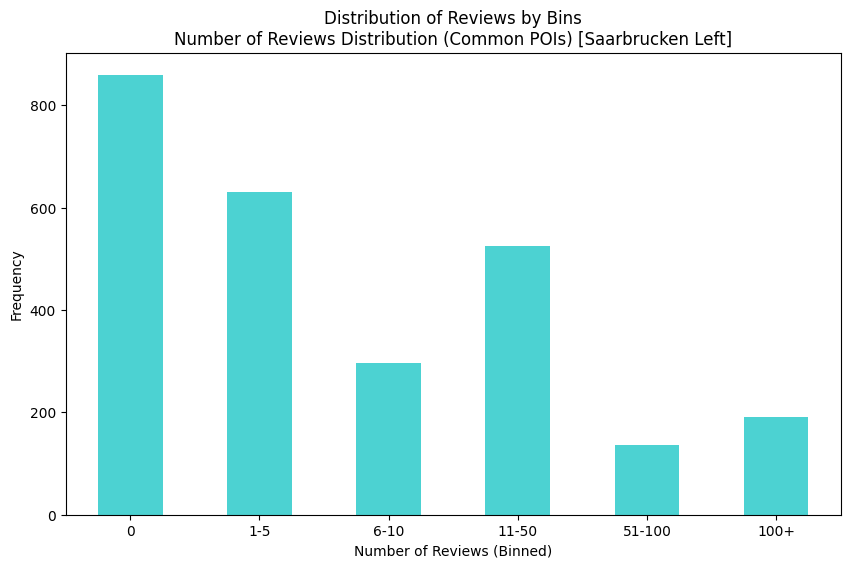

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the CSV files
csv_files = [
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_google_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\google_poi_search\data\saarbrucken_left_half_in_outscraper_not_in_common_pois.csv',
    r'C:\Users\Hewan Shrestha\Desktop\detect-car-in-LR-satellite-images\Google_Places\Search_Notebooks(Copy)\new_data_collection_google_poi_to_outscraper\saarbrucken_left_half_google_outscraper_common_pois.csv'
]

# Titles for each plot
titles = [
    'Number of Reviews Distribution (Google POIs) [Saarbrucken Left]',
    'Number of Reviews Distribution (Outscraper POIs) [Saarbrucken Left]',
    'Number of Reviews Distribution (Common POIs) [Saarbrucken Left]'
]

# Define bins for the number of reviews
bins = [0, 1, 5, 10, 50, 100, float('inf')]
labels = ['0', '1-5', '6-10', '11-50', '51-100', '100+']

# Read each CSV file and plot the data
for csv_file, title in zip(csv_files, titles):
    df = pd.read_csv(csv_file)
    
    # Ensure 'reviews' column is numeric, fill NaN with 0
    df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').fillna(0)
    
    # Create bins and categorize the data
    df['review_bins'] = pd.cut(df['reviews'], bins=bins, labels=labels, right=False)
    
    # Plot the histogram for review bins
    plt.figure(figsize=(10, 6))
    df['review_bins'].value_counts(sort=False).plot(kind='bar', alpha=0.7, color='c')
    plt.title(f'Distribution of Reviews by Bins\n{title}')
    plt.xlabel('Number of Reviews (Binned)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()

    # # Plot a density plot for number of reviews
    # plt.figure(figsize=(10, 6))
    # df['reviews'].plot(kind='density', alpha=0.75, color='b')
    # plt.title(f'Density Plot of Reviews\n{title}')
    # plt.xlabel('Number of Reviews')
    
    # # Show the plot
    # plt.show()
